In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = ["#ffb400", "#363445", "#9080ff"]
import numpy as np

In [2]:
# Specify the path to the Excel file containing data
excel_file_path = 'Data Assignment.xlsx'

# Read data from the 'Associate ABC' sheet into a DataFrame named 'Associate_abc'
Associate_abc = pd.read_excel(excel_file_path, sheet_name='Associate ABC')

# Read data from the 'Associate XYZ' sheet into a DataFrame named 'Associate_xyz'
Associate_xyz = pd.read_excel(excel_file_path, sheet_name='Associate XYZ')

# Read data from the 'Associlate KLM' sheet into a DataFrame named 'Associate_klm'
# Note: There's a typo in the sheet name ('Associlate' instead of 'Associate')
Associate_klm = pd.read_excel(excel_file_path, sheet_name='Associlate KLM')

## Data Cleaning & Transforming

In [3]:
Associate_abc = Associate_abc.rename(columns={
    'Date': 'date',
    'No of Leads': 'no_of_leads',
    'Time Spent on LG (in mins)': 'time_spent_on_lg',
})

Associate_xyz = Associate_xyz.rename(columns={
    'Date': 'date',
    'No of Leads': 'no_of_leads',
    'Time Spent on LG (in mins)': 'time_spent_on_lg',
})

Associate_klm = Associate_klm.rename(columns={
    'Date': 'date',
    'No of Leads': 'no_of_leads',
    'Time Spent on LG': 'time_spent_on_lg',
})

### Removing Duplicated Dates as it might have been a typo in the Data

In [4]:
#Deleting duplicate dates prevents data distortion.

#function for removing duplicates

def remove_duplicate_dates(dataframe, date_column):
    """
    Remove duplicate date values from a DataFrame.

    Parameters:
    - dataframe: pd.DataFrame
        The DataFrame containing the date column.
    - date_column: str
        The name of the date column.

    Returns:
    - pd.DataFrame
        The DataFrame with duplicate date values removed.
    """
    # Convert the specified date column to datetime format
    dataframe[date_column] = pd.to_datetime(dataframe[date_column], format="%d/%m/%Y")
    
    # Drop rows with duplicate dates, keeping only the first occurrence
    dataframe = dataframe.drop_duplicates(subset=[date_column])
    
    return dataframe

# Clean duplicate dates for Associate_abc
Associate_abc = remove_duplicate_dates(Associate_abc, "date")

# Clean duplicate dates for Associate_xyz
Associate_xyz = remove_duplicate_dates(Associate_xyz, "date")

# Clean duplicate dates for Associate_klm
Associate_klm = remove_duplicate_dates(Associate_klm, "date")


In [5]:
# Checking for null 

print("Associate ABC")
Associate_abc.info(), 
print("")
print("Associate XYZ")
Associate_xyz.info(),
print("")
print("Associate KLM")
Associate_klm.info()

Associate ABC
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              61 non-null     datetime64[ns]
 1   no_of_leads       44 non-null     float64       
 2   time_spent_on_lg  44 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.9 KB

Associate XYZ
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              61 non-null     datetime64[ns]
 1   no_of_leads       41 non-null     float64       
 2   time_spent_on_lg  41 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.9 KB

Associate KLM
<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 3 

## Filling the null value as 0 on columns No. of lead and Time Spent on LG

In [6]:
Associate_abc = Associate_abc.fillna(0)
Associate_xyz = Associate_xyz.fillna(0)
Associate_klm = Associate_klm.fillna(0)

## EDA

## Getting a better understanding of the data


### Associate Information Overview

In [7]:
print("Associate ABC")
Associate_abc.info(), 
print("")
print("Associate XYZ")
Associate_xyz.info(),
print("")
print("Associate KLM")
Associate_klm.info()

Associate ABC
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              61 non-null     datetime64[ns]
 1   no_of_leads       61 non-null     float64       
 2   time_spent_on_lg  61 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.9 KB

Associate XYZ
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              61 non-null     datetime64[ns]
 1   no_of_leads       61 non-null     float64       
 2   time_spent_on_lg  61 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.9 KB

Associate KLM
<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 3 

### Summary Statistics for Each Associate

In [8]:
print("Associate ABC")
print(Associate_abc.describe())
print("Associate XYZ")
print(Associate_xyz.describe())
print("Associate KLM")
print(Associate_klm.describe())

Associate ABC
       no_of_leads  time_spent_on_lg
count    61.000000          61.00000
mean      4.622951         244.42623
std       4.637398         179.65267
min       0.000000           0.00000
25%       0.000000           0.00000
50%       4.000000         300.00000
75%       8.000000         300.00000
max      15.000000         540.00000
Associate XYZ
       no_of_leads  time_spent_on_lg
count    61.000000         61.000000
mean      7.295082        260.163934
std       5.544800        195.247636
min       0.000000          0.000000
25%       0.000000          0.000000
50%       9.000000        360.000000
75%      11.000000        420.000000
max      15.000000        600.000000
Associate KLM
       no_of_leads  time_spent_on_lg
count   124.000000        124.000000
mean      8.637097        332.016129
std       5.136091        161.808779
min       0.000000          0.000000
25%       5.000000        300.000000
50%       9.000000        300.000000
75%      13.000000        420.000

## Key Observations:
- All Associates have a varying number of leads, with Associate KLM having the highest average leads generated on  adaily basis with 8 Leads.
- Time spent on LG shows some variation, with Associate XYZ having the highest average time spent on a daily basis 260 mins.


## Boxplots for Associates: No of Leads and Time Spent on LG To find Outlier

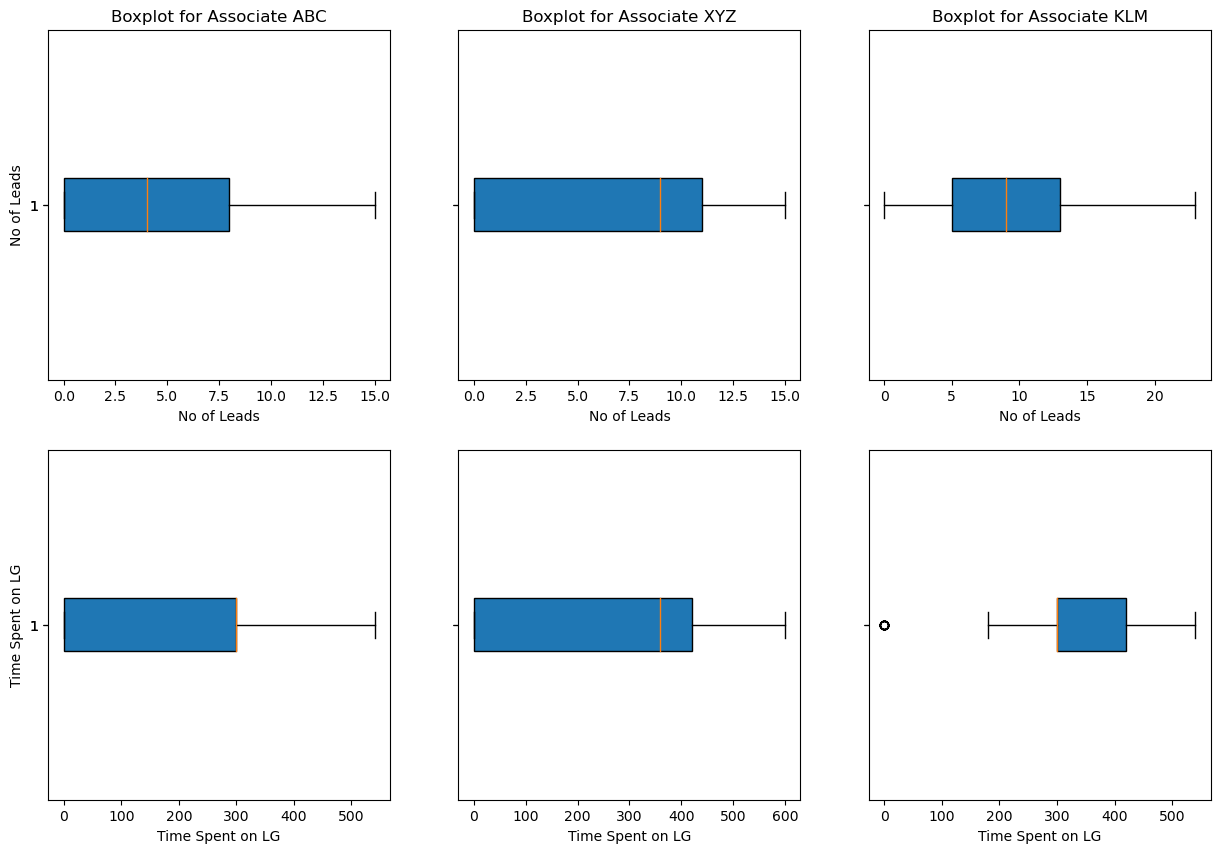

In [9]:
#Associate_abc, Associate_xyz, and Associate_klm
associates = [Associate_abc, Associate_xyz, Associate_klm]
associate_names = ['ABC', 'XYZ', 'KLM']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=len(associates), figsize=(15, 10), sharey='row')

# Create boxplots for 'No of Leads' for each associate
for ax, assoc, name in zip(axes[0], associates, associate_names):
    ax.boxplot(x=assoc['no_of_leads'].dropna(), vert=False, patch_artist=True)
    ax.set_xlabel('No of Leads')
    ax.set_title(f'Boxplot for Associate {name}')

# Create boxplots for 'Time Spent on LG' for each associate
for ax, assoc in zip(axes[1], associates):
    ax.boxplot(x=assoc['time_spent_on_lg'].dropna(), vert=False, patch_artist=True)
    ax.set_xlabel('Time Spent on LG')

# Add y-axis labels
axes[0, 0].set_ylabel('No of Leads')
axes[1, 0].set_ylabel('Time Spent on LG')

# Show the plot
plt.show()


C:\Users\THE USER\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_spent_on_lg'>

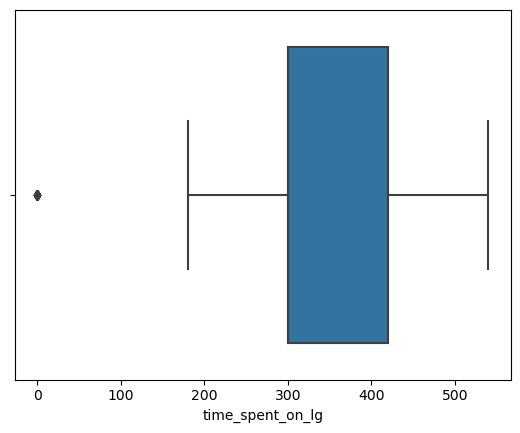

In [10]:
sns.boxplot(Associate_klm['time_spent_on_lg'])

In [11]:
#'time_spent_on_lg' is the column of interest in Associate_klm
data = Associate_klm['time_spent_on_lg']

# Calculate the IQR (Interquartile Range)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]

# Display the outliers
print("Outliers:", outliers)


Outliers: 2      0.0
10     0.0
11     0.0
15     0.0
16     0.0
17     0.0
27     0.0
61     0.0
62     0.0
63     0.0
64     0.0
65     0.0
66     0.0
86     0.0
105    0.0
108    0.0
112    0.0
Name: time_spent_on_lg, dtype: float64


*After careful consideration, I have chosen not to remove outliers from Associate KLM's "time_spent_on_lg" column. These outliers correspond to periods of leave taken by the associate. Since these instances fall outside the normal range of the data, they appear as outliers. However, removing them could potentially impact the accuracy of further analysis. It's crucial to retain such information as it provides insights into the associate's absence from lead generation activities, contributing to a more comprehensive understanding of the dataset.*

## Correlation Analysis for Associates

- To understand the relationship between two continuous variables, specifically focusing on the association between the time associates spend on lead generation ("time_spent_on_lg") and the number of leads they generate ("no_of_leads"). The correlation coefficient quantifies the strength and direction of this linear relationship.

In [12]:
# Associate_abc, Associate_xyz, and Associate_klm

# Associate ABC
correlation_abc = Associate_abc['time_spent_on_lg'].corr(Associate_abc['no_of_leads'])
print(f"Correlation for Associate ABC: {correlation_abc}")

# Associate XYZ
correlation_xyz = Associate_xyz['time_spent_on_lg'].corr(Associate_xyz['no_of_leads'])
print(f"Correlation for Associate XYZ: {correlation_xyz}")

# Associate KLM
correlation_klm = Associate_klm['time_spent_on_lg'].corr(Associate_klm['no_of_leads'])
print(f"Correlation for Associate KLM: {correlation_klm}")


Correlation for Associate ABC: 0.7168186964081542
Correlation for Associate XYZ: 0.9084080300676208
Correlation for Associate KLM: 0.7097442796891862


**The correlation analysis reveals a strong positive relationship between time spent on lead generation and the number of leads for each associate: ABC (0.72), XYZ (0.91), and KLM (0.71).**

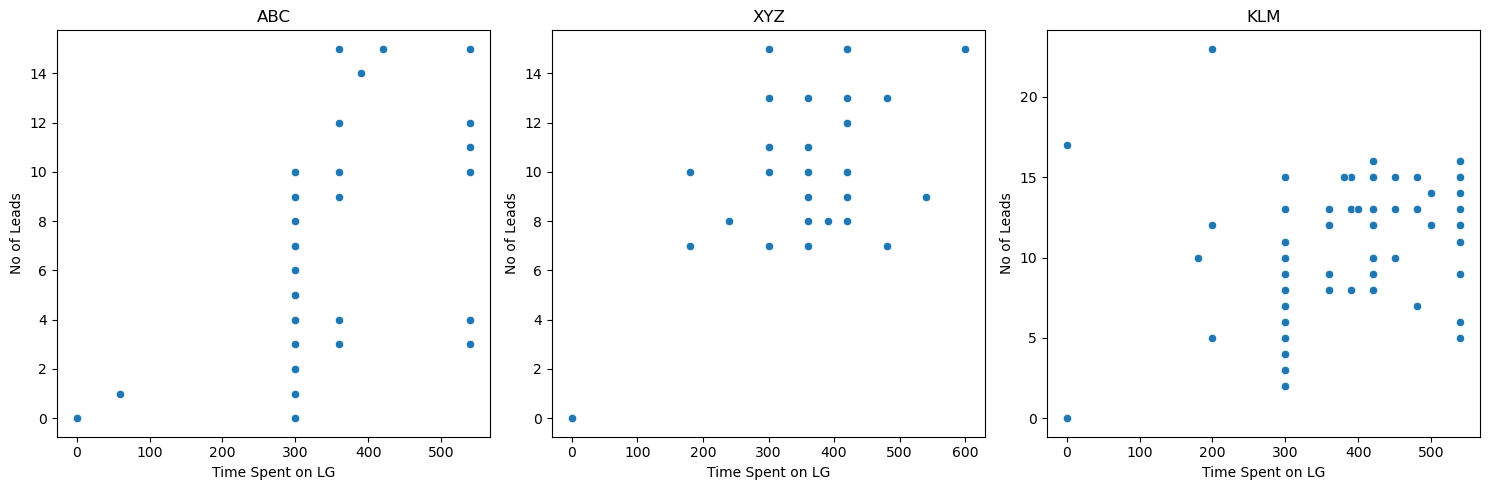

In [13]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Scatter plot for Associate ABC
sns.scatterplot(x='time_spent_on_lg', y='no_of_leads', data=Associate_abc, ax=axes[0])
axes[0].set_title('ABC')
axes[0].set_xlabel('Time Spent on LG')
axes[0].set_ylabel('No of Leads')

# Scatter plot for Associate XYZ
sns.scatterplot(x='time_spent_on_lg', y='no_of_leads', data=Associate_xyz, ax=axes[1])
axes[1].set_title('XYZ')
axes[1].set_xlabel('Time Spent on LG')
axes[1].set_ylabel('No of Leads')

# Scatter plot for Associate KLM
sns.scatterplot(x='time_spent_on_lg', y='no_of_leads', data=Associate_klm, ax=axes[2])
axes[2].set_title('KLM')
axes[2].set_xlabel('Time Spent on LG')
axes[2].set_ylabel('No of Leads')

# Adjust layout
plt.tight_layout()
plt.show()


**After analyzing the graphs, it becomes evident that the positive correlation between time spent and leads generated is significant but has its limitations. In the case of all associates, this correlation is observed within a specific time range, approximately ranging from 300 to 400 minutes (5 to 6.5 hours) per day.**

## Finding out which time is good for each Associate

In [14]:
# Associate ABC
# Create a new column representing time spent in 50-minute intervals
Associate_abc['time_intervals'] = (Associate_abc['time_spent_on_lg'] // 50) * 50

# Group by the new column and count the number of leads in each interval
leads_per_interval_abc = Associate_abc.groupby('time_intervals')['no_of_leads'].sum().reset_index()

# Print or display the result for Associate ABC
print("Associate ABC:")
print(leads_per_interval_abc)
print()

# Associate XYZ
# Create a new column representing time spent in 50-minute intervals
Associate_xyz['time_intervals'] = (Associate_xyz['time_spent_on_lg'] // 50) * 50

# Group by the new column and count the number of leads in each interval
leads_per_interval_xyz = Associate_xyz.groupby('time_intervals')['no_of_leads'].sum().reset_index()

# Print or display the result for Associate XYZ
print("Associate XYZ:")
print(leads_per_interval_xyz)
print()

# Associate KLM
# Create a new column representing time spent in 50-minute intervals
Associate_klm['time_intervals'] = (Associate_klm['time_spent_on_lg'] // 50) * 50

# Group by the new column and count the number of leads in each interval
leads_per_interval_klm = Associate_klm.groupby('time_intervals')['no_of_leads'].sum().reset_index()

# Print or display the result for Associate KLM
print("Associate KLM:")
print(leads_per_interval_klm)


Associate ABC:
   time_intervals  no_of_leads
0             0.0          0.0
1            50.0          1.0
2           300.0        140.0
3           350.0         67.0
4           400.0         15.0
5           500.0         59.0

Associate XYZ:
   time_intervals  no_of_leads
0             0.0          0.0
1           150.0         17.0
2           200.0          8.0
3           300.0         67.0
4           350.0         76.0
5           400.0        220.0
6           450.0         33.0
7           500.0          9.0
8           600.0         15.0

Associate KLM:
   time_intervals  no_of_leads
0             0.0         17.0
1           150.0         10.0
2           200.0         40.0
3           300.0        285.0
4           350.0        113.0
5           400.0        233.0
6           450.0         96.0
7           500.0        277.0


## Optimal Time Frame Analysis for Associates

### Associate ABC:
The most optimal time frame for lead generation by Associate ABC is the 300-minute interval, during which the associate generated the highest number of leads, totaling 140.

### Associate XYZ:
For Associate XYZ, the 400-minute interval appears to be the most effective, with a remarkable lead count of 220.

### Associate KLM:
Associate KLM achieved the highest number of leads during the 300-minute interval, generating 285 leads.

These findings suggest that the specified time intervals represent the most productive periods for each associate in terms of lead generation. It is recommended to consider these optimal time frames when planning work schedules to maximize results without overworking the associates.

## No. of Leads Frequency

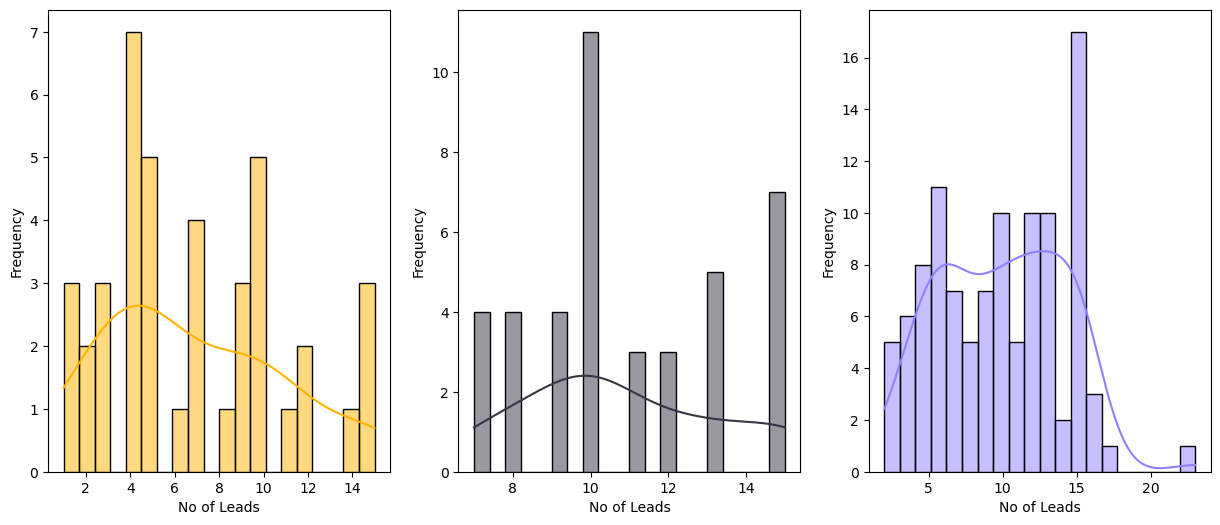

In [15]:
# Associate_abc, Associate_xyz, and Associate_klm
associates = [Associate_abc, Associate_xyz, Associate_klm]
associate_names = ['ABC', 'XYZ', 'KLM']
#Color pallette
color = ["#ffb400", "#363445", "#9080ff"]
# Set up subplots
fig, axes = plt.subplots(1, len(associates), figsize=(15, 6))

# Create histograms for 'No of Leads' for each associate without including 0 values
for ax, assoc, name, color in zip(axes, associates, associate_names, color):
    non_zero_leads = assoc[assoc['no_of_leads'] > 0]
    sns.histplot(non_zero_leads['no_of_leads'], bins=20, kde=True, color=color, ax=ax)
    ax.set_xlabel('No of Leads')
    ax.set_ylabel('Frequency')


# Show the plot
plt.show()


For Associate ABC, the maximum number of leads generated on a single day was 15, with an average daily lead generation of 4.6.

Similarly, Associate XYZ achieved a peak of 16 leads in a single day, surpassing their average daily lead generation of 7.2.

In the case of Associate KLM, the highest daily lead generation reached 22, while maintaining an average daily lead generation of 8.3.


In [16]:
Associate_klm.describe()

,no_of_leads,time_spent_on_lg,time_intervals
count,124.000000,124.000000,124.000000
mean,8.637097,332.016129,319.758065
std,5.136091,161.808779,151.122971
min,0.000000,0.000000,0.000000
25%,5.000000,300.000000,300.000000
50%,9.000000,300.000000,300.000000
75%,13.000000,420.000000,400.000000
max,23.000000,540.000000,500.000000


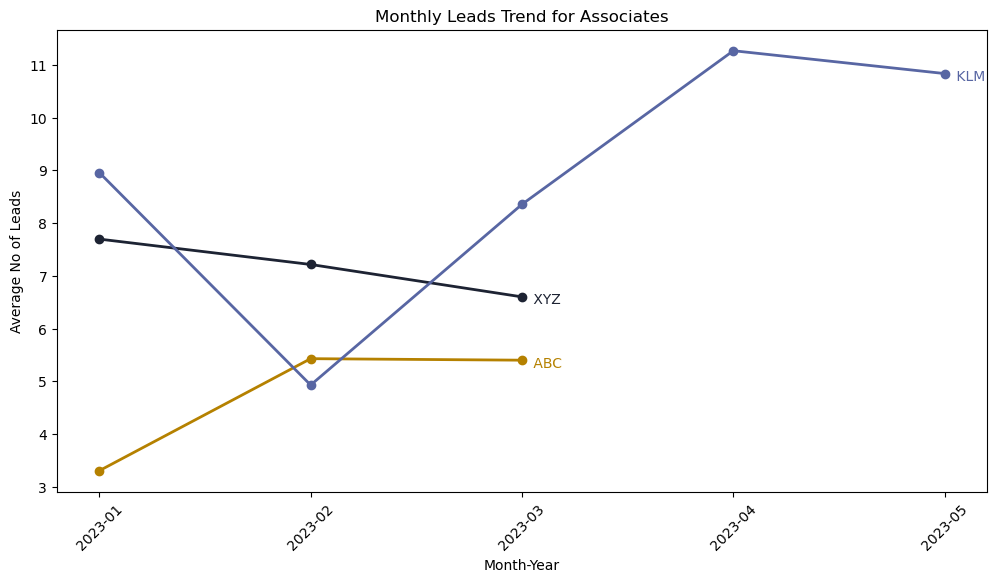

In [31]:
# Associate_abc, Associate_xyz, and Associate_klm
associates = [Associate_abc, Associate_xyz, Associate_klm]
associate_names = ['ABC', 'XYZ', 'KLM']

color = ["#ffb400", "#363445", "#9080ff"]

plt.figure(figsize=(12, 6))

for associate, name, color in zip(associates, associate_names, color):
    # Adding a monthly column for the monthly insights
    associate['month_year'] = associate['date'].dt.strftime('%Y-%m')
    monthly_data = associate.groupby('month_year')['no_of_leads'].mean().reset_index()
    plt.plot(monthly_data['month_year'], monthly_data['no_of_leads'], marker='o', label=f'Associate {name}', color=color, linewidth=2)

    # Annotate the end of each line with the associate name
    plt.annotate(f'Associate {name}', (monthly_data['month_year'].iloc[-1], monthly_data['no_of_leads'].iloc[-1]),
                 textcoords="offset points", xytext=(5,-5), ha='left', color=color)

plt.xlabel('Month-Year')
plt.ylabel('Average No of Leads')
plt.title('Monthly Leads Trend for Associates')
plt.xticks(rotation=45)
plt.show()


The graph illustrates the lead generation trends for Associates XYZ, KLM, and ABC over time.

- **Associate XYZ:** Initially, they began with a strong performance, but subsequently experienced a decline in lead generation.

- **Associate KLM:** After the first month, Associate KLM witnessed a significant boost in lead generation, indicating a positive trend.

- **Associate ABC:** Demonstrated a steady and consistent increase in lead generation throughout the observed period.


## KPI's

In [18]:
# Associate_abc, Associate_xyz, and Associate_klm 

def calculate_kpis(df):
    # Filter out rows with zero time spent on lead generation
    df_filtered = df[df['time_spent_on_lg'] > 0]

    result = pd.DataFrame({
        'Average Leads per Day': [df_filtered['no_of_leads'].mean()],
        'Average Time Spent per Day': [df_filtered['time_spent_on_lg'].mean()],
        'Conversion Rate (Leads per Hour)': [(df_filtered['no_of_leads'] / (df_filtered['time_spent_on_lg'] / 60)).mean()],
        'Total Leads Generated': [df_filtered['no_of_leads'].sum()],
        'Lead Generation Efficiency': [(df_filtered['no_of_leads'] / df_filtered['time_spent_on_lg']).mean()]   
    })
    return result

# Calculate KPIs for each associate
Associate_abc_kpi = calculate_kpis(Associate_abc)
Associate_xyz_kpi = calculate_kpis(Associate_xyz)
Associate_klm_kpi = calculate_kpis(Associate_klm)

# Display the results
print("Associate ABC:")
print(Associate_abc_kpi)
print("\nAssociate XYZ:")
print(Associate_xyz_kpi)
print("\nAssociate KLM:")
print(Associate_klm_kpi)


Associate ABC:
   Average Leads per Day  Average Time Spent per Day  \
0                6.55814                  346.744186   

   Conversion Rate (Leads per Hour)  Total Leads Generated  \
0                          1.132223                  282.0   

   Lead Generation Efficiency  
0                     0.01887  

Associate XYZ:
   Average Leads per Day  Average Time Spent per Day  \
0              10.853659                  387.073171   

   Conversion Rate (Leads per Hour)  Total Leads Generated  \
0                          1.748399                  445.0   

   Lead Generation Efficiency  
0                     0.02914  

Associate KLM:
   Average Leads per Day  Average Time Spent per Day  \
0               9.850467                  384.766355   

   Conversion Rate (Leads per Hour)  Total Leads Generated  \
0                          1.564122                 1054.0   

   Lead Generation Efficiency  
0                    0.026069  


1. **Average Leads per Day:**
   - Measures the average number of leads generated by the associate on a daily basis.

2. **Average Time Spent per Day:**
   - Represents the average amount of time the associate spends on lead generation each day.

3. **Conversion Rate (Leads per Hour):**
   - Calculates the rate at which leads are generated per hour, providing insights into the associate's efficiency in lead conversion.

4. **Total Leads Generated:**
   - Summarizes the overall number of leads generated by the associate over the given time period.

5. **Lead Generation Efficiency:**
   - Evaluates the efficiency of lead generation by measuring the ratio of leads generated to the time spent on lead generation. Higher efficiency indicates optimal use of time for lead generation.


## Question

## 1.What is the total number of leads generated by Each Associate?

In [19]:
# Associate_abc, Associate_xyz, and Associate_klm


total_leads_abc = Associate_abc['no_of_leads'].sum()
total_leads_xyz = Associate_xyz['no_of_leads'].sum()
total_leads_klm = Associate_klm['no_of_leads'].sum()

print(f"Total Leads Generated by Associate ABC: {total_leads_abc}")
print(f"Total Leads Generated by Associate XYZ: {total_leads_xyz}")
print(f"Total Leads Generated by Associate KLM: {total_leads_klm}")


Total Leads Generated by Associate ABC: 282.0
Total Leads Generated by Associate XYZ: 445.0
Total Leads Generated by Associate KLM: 1071.0


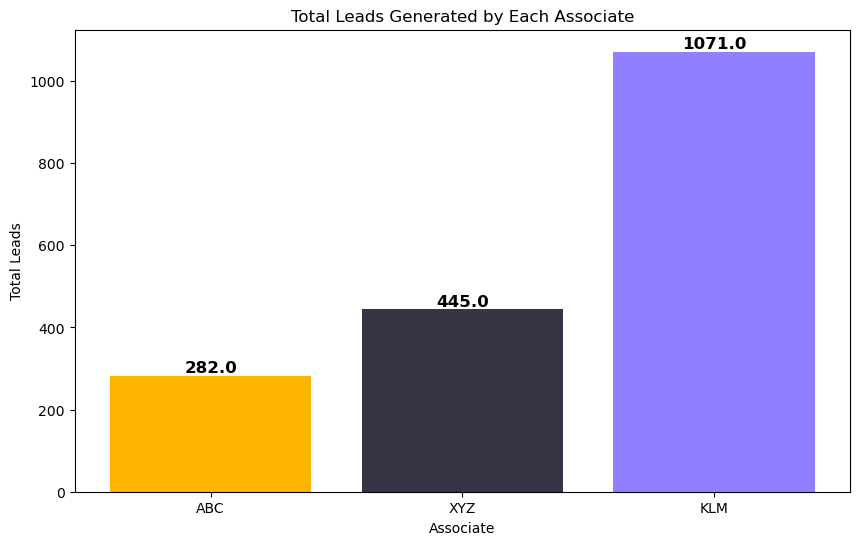

In [20]:

# Data
associates = ['ABC', 'XYZ', 'KLM']
total_leads = [total_leads_abc, total_leads_xyz, total_leads_klm]
color= ["#ffb400", "#363445", "#9080ff"]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(associates, total_leads, color=color)

# Adding values on top of the bars
for bar, value in zip(bars, total_leads):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value),
             ha='center', va='bottom', fontsize=12, color='black',fontweight='bold')

plt.title('Total Leads Generated by Each Associate')
plt.xlabel('Associate')
plt.ylabel('Total Leads')
plt.show()


## 2.What is the total number of leaves taken by each associate (considering Saturday and Sunday as holidays)?

In [21]:
#Adding a new column of weekdays
Associate_abc['Weekday'] = Associate_abc['date'].dt.weekday + 1
Associate_xyz['Weekday'] = Associate_xyz['date'].dt.weekday + 1
Associate_klm['Weekday'] = Associate_klm['date'].dt.weekday + 1

In [22]:
days_not_worked_abc = Associate_abc[(Associate_abc['time_spent_on_lg'] == 0) & (~Associate_abc['Weekday'].isin([6, 7]))]
days_not_worked_xyz = Associate_xyz[(Associate_xyz['time_spent_on_lg'] == 0) & (~Associate_xyz['Weekday'].isin([6, 7]))]
days_not_worked_klm = Associate_klm[(Associate_klm['time_spent_on_lg'] == 0) & (~Associate_klm['Weekday'].isin([6, 7]))]
#but on 2023-05-01 Associate KLM generated 17 leads without spending time on generating lead which could be a data entry error

In [23]:
days_not_worked_abc.count(), days_not_worked_xyz.count(),days_not_worked_klm.count()

(date                2
 no_of_leads         2
 time_spent_on_lg    2
 time_intervals      2
 month_year          2
 Weekday             2
 dtype: int64,
 date                4
 no_of_leads         4
 time_spent_on_lg    4
 time_intervals      4
 month_year          4
 Weekday             4
 dtype: int64,
 date                14
 no_of_leads         14
 time_spent_on_lg    14
 time_intervals      14
 month_year          14
 Weekday             14
 dtype: int64)

- **Associate ABC:** Took a total of 2 leaves, excluding Saturdays and Sundays.
- **Associate XYZ:** Took a total of 4 leaves, excluding Saturdays and Sundays.
- **Associate KLM:** Took a total of 14 leaves, excluding Saturdays and Sundays.


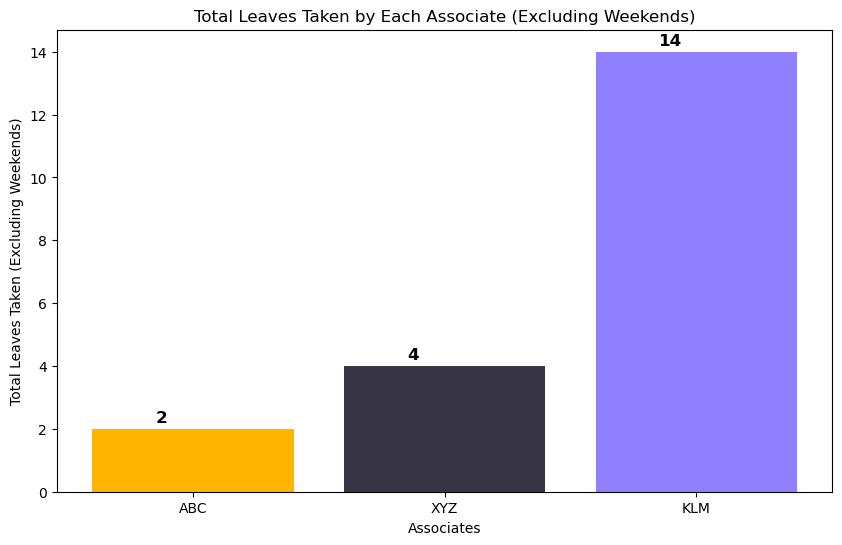

In [24]:
#Associate_abc, Associate_xyz, and Associate_klm
associates = ['ABC', 'XYZ', 'KLM']
total_leaves = [2, 4, 14]

# Plotting color
colors = ["#ffb400", "#363445", "#9080ff"]

# Plotting the bar chart 
plt.figure(figsize=(10, 6))
bars = plt.bar(associates, total_leaves, color=colors)
plt.xlabel('Associates')
plt.ylabel('Total Leaves Taken (Excluding Weekends)')
plt.title('Total Leaves Taken by Each Associate (Excluding Weekends)')

# Adding total values on top of each bar
for bar, total in zip(bars, total_leaves):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, str(total), fontsize=12, color='black',fontweight='bold')

plt.show()


## 3.What is the average number of leads generated by each associate?

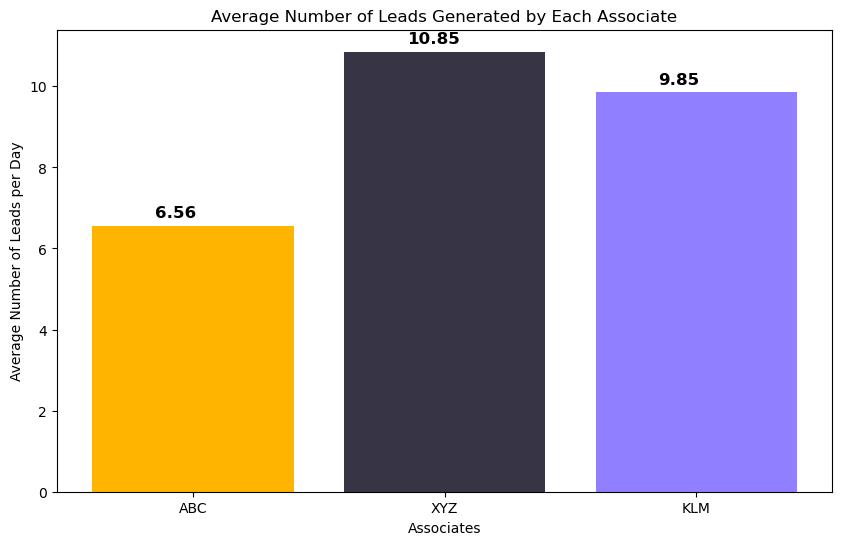

In [35]:
# Got the average leads from KPI that i made earlier average_leads = [6.55814, 10.853659, 9.850467] respectivly ABC,XYZ,KLM

average_leads = [6.55814, 10.853659, 9.850467]
associates = ['ABC', 'XYZ', 'KLM']
colors = ["#ffb400", "#363445", "#9080ff"]

plt.figure(figsize=(10, 6))
bars = plt.bar(associates, average_leads, color=colors)
plt.xlabel('Associates')
plt.ylabel('Average Number of Leads per Day')
plt.title('Average Number of Leads Generated by Each Associate')

# Adding average values on top of each bar
for bar, average in zip(bars, average_leads):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, f'{average:.2f}', fontsize=12, color='black', fontweight='bold')

plt.show()


## 4.Which associate has been the most consistent in lead generation?

In [25]:
# Associate_abc, Associate_xyz, Associate_klm

# Calculate standard deviation for each associate
std_dev_abc = Associate_abc['no_of_leads'].std()
std_dev_xyz = Associate_xyz['no_of_leads'].std()
std_dev_klm = Associate_klm['no_of_leads'].std()

# Display standard deviations
print(f"Standard Deviation for Associate_abc: {std_dev_abc}")
print(f"Standard Deviation for Associate_xyz: {std_dev_xyz}")
print(f"Standard Deviation for Associate_klm: {std_dev_klm}")



Standard Deviation for Associate_abc: 4.637398460438172
Standard Deviation for Associate_xyz: 5.544800153582581
Standard Deviation for Associate_klm: 5.136090502424502


**The associate with the lowest standard deviation is the most consistent in lead generation.
 i.e. Associate ABC**

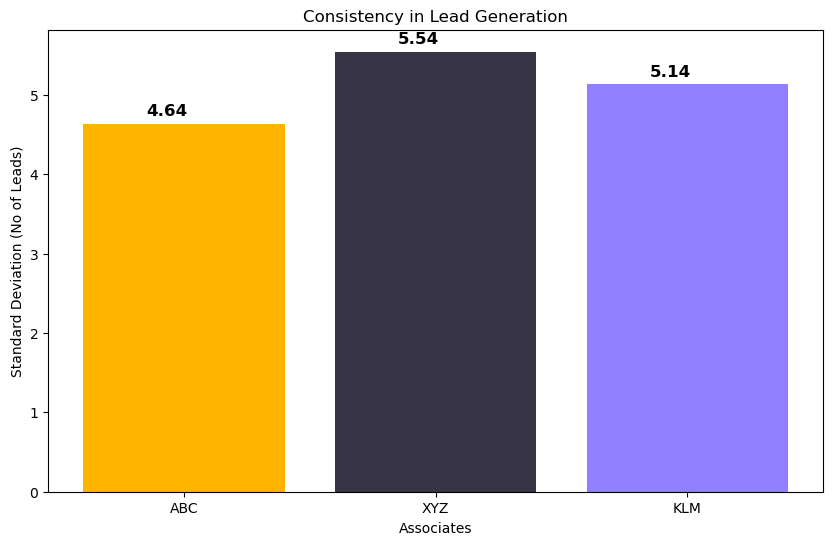

In [26]:



data = {'Associate': ['ABC', 'XYZ', 'KLM'],
        'Standard Deviation': [std_dev_abc, std_dev_xyz, std_dev_klm]}

df_visualization = pd.DataFrame(data)

# Plotting color
colors = ["#ffb400", "#363445", "#9080ff"]

# Plotting the bar chart 
plt.figure(figsize=(10, 6))
bars = plt.bar(df_visualization['Associate'], df_visualization['Standard Deviation'], color=colors)
plt.xlabel('Associates')
plt.ylabel('Standard Deviation (No of Leads)')
plt.title('Consistency in Lead Generation')

# Adding standard deviation values on top of each bar
for bar, std_dev in zip(bars, df_visualization['Standard Deviation']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1, f"{std_dev:.2f}", fontsize=12, color='black', fontweight='bold')

plt.show()


## Do you remove missing values from the data-set for analysis? Provide rationale for your answer.

- I have decided to turn the missing values to 0 as it made the most sense to me because the missing values were mostly in the 'No. of leads' and 'Total time spent on lead Generation' columns. This implies different reasons in these columns. For instance, in the 'No. of leads' column, it would signify that on that particular day no leads were generated. In the 'Total time spent on lead Generation' column, it would have meant that on that day, no time was spent on lead generation, or the Associate hadn't worked on that day. Therefore, I decided to turn them to zero.

- Although there could have been a different reason, such as the Associate forgetting to clock in or there might be some glitch in the system, these scenarios seemed unlikely to me. So, I proceeded with the first reason.

- **I opted to exclude instances with 'Total Time Spent on Lead Generation' equal to zero from KPI calculations. This decision aimed to enhance accuracy and reliability, preventing potential distortions in the results.**

***Forecasting Was done in Excel as the Data was very limited it became hard to predict Accurate Forecasting using Machine Learning***